# Mini Project

In [ ]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This script combines the data from the UCI HAR Dataset into a more usable format.
# The data is combined into a single csv file for each subject and activity.
# The data is then stored in the Combined folder.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
import pandas as pd
import numpy as np
import os

# Give the path of the test and train folder of UCI HAR Dataset
train_path = "./UCI HAR Dataset/train"
test_path = "./UCI HAR Dataset/test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Traing Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),delim_whitespace=True,header=None)


# Read the subject IDs
subject_train = pd.read_csv(os.path.join(train_path,"subject_train.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(train_path,"y_train.txt"),delim_whitespace=True,header=None)


# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined","Train",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined","Train",ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:,0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
        save_path = os.path.join("Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
        data.to_csv(save_path,index=False)

print("Done Combining the training data")


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Test Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),delim_whitespace=True,header=None)

# Read the subject IDs
subject_test = pd.read_csv(os.path.join(test_path,"subject_test.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(test_path,"y_test.txt"),delim_whitespace=True,header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):

        sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
        labels = y.loc[sub_idxs]

        # Toggle through all the labels.
        for label in np.unique(labels.values):

            if not os.path.exists(os.path.join("Combined","Test",ACTIVITIES[label])):
                os.makedirs(os.path.join("Combined","Test",ACTIVITIES[label]))

            label_idxs = labels[labels.iloc[:,0] == label].index

            accx = []
            accy = []
            accz = []
            for idx in label_idxs:
                if accx is not None:
                    accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                    accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                    accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

                else:
                    accx = total_acc_x.loc[idx]
                    accy = total_acc_y.loc[idx]
                    accz = total_acc_z.loc[idx]

            # saving the data into csv file
            data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
            save_path = os.path.join("Combined","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
            data.to_csv(save_path,index=False)

print("Done Combining the testing data")
print("Done Combining the data")

#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Done Combining the training data
Done Combining the testing data
Done Combining the data


In [ ]:

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING, TESTING, AND VALIDATION purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training,testing, and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4,stratify=y)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=4,stratify=y_test)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
print("Validation data shape: ",X_val.shape)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



Training data shape:  (108, 500, 3)
Testing data shape:  (36, 500, 3)
Validation data shape:  (36, 500, 3)


# Human Activity Recognition(Mini Project)
## Question 1

Plot the waveform for data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 colunms to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data?

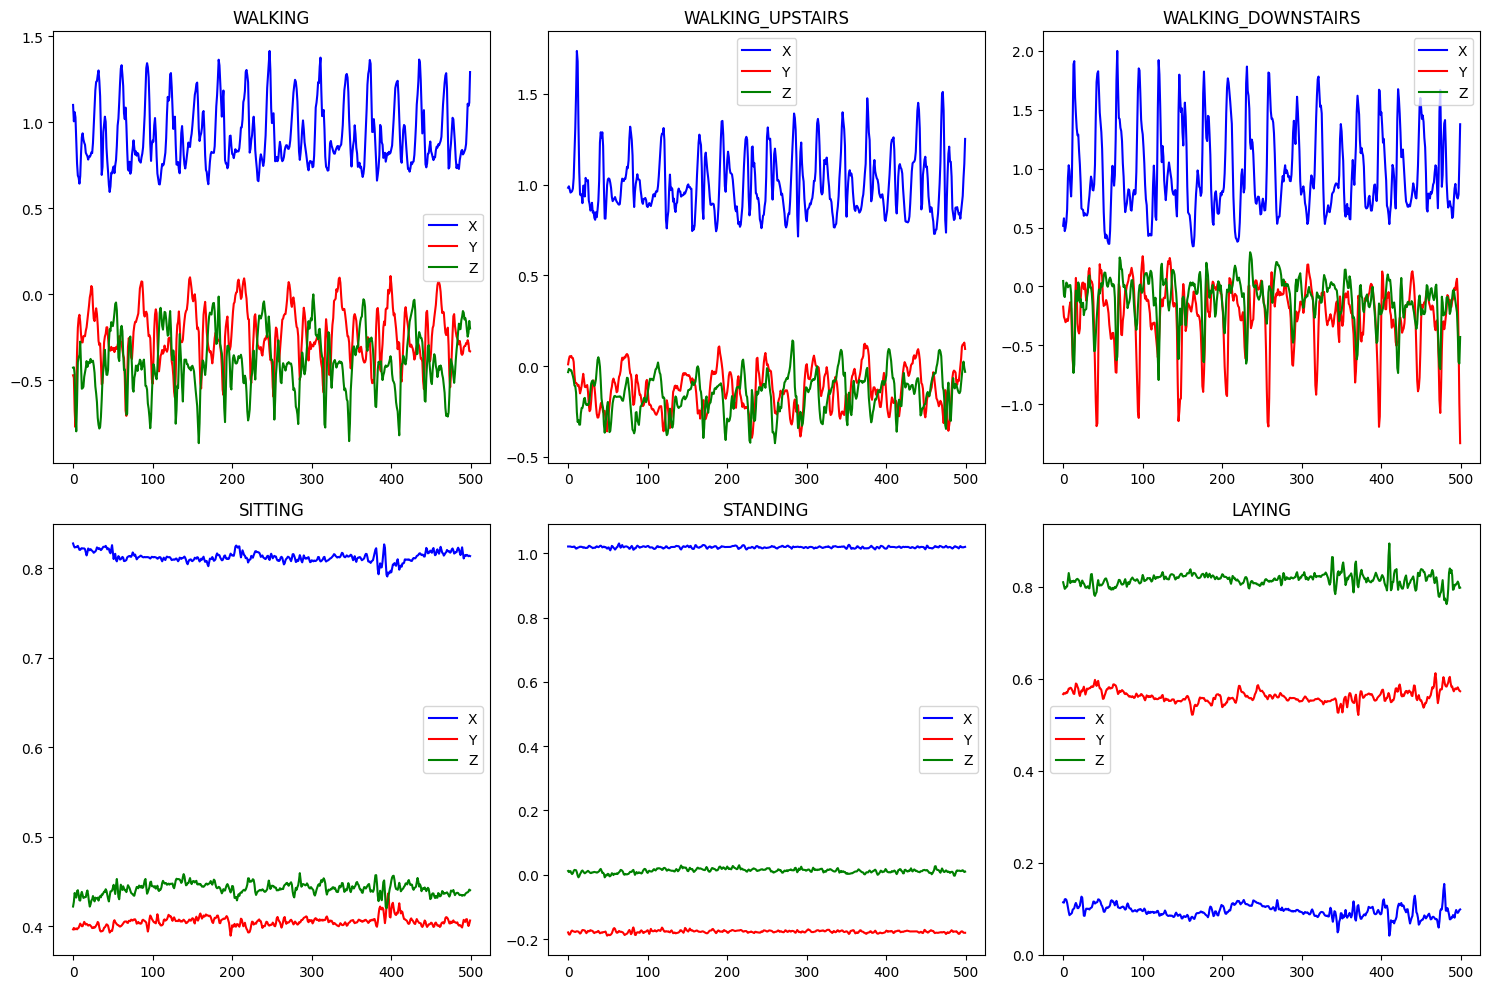

In [ ]:
import matplotlib.pyplot as plt

# Plotting waveforms for each activity class
activities = list(classes.keys())

plt.figure(figsize=(15, 10))

for i, activity in enumerate(activities, 1):
    plt.subplot(2, 3, i)
    activity_indices = np.where(y_train == classes[activity])[0]
    sample_data = X_train[activity_indices][0,:,0]  # Taking the first sample for illustration ; X axis
    #color

    plt.plot(sample_data.flatten(), color='blue',label="X")

    plt.title(activity)
    sample_data = X_train[activity_indices][0,:,1]  # Taking the first sample for illustration ; Y axis
    plt.plot(sample_data.flatten(), color='red',label="Y")

    plt.title(activity)
    sample_data = X_train[activity_indices][0,:,2]  # Taking the first sample for illustration ; Z axis
    plt.plot(sample_data.flatten(), color='green',label="Z")

    plt.title(activity)
    plt.legend()
plt.tight_layout()
plt.show()

# Question 2
Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration
 for each activity and justify your answer.

In [ ]:
#que2
total_acceleration = np.sum(X_train[:, :, :]**2, axis=2)

#nd array to dataframe
total_acceleration = pd.DataFrame(total_acceleration)
#classify the dataset on the basis of activities
l=total_acceleration.groupby(y_train)
m=l.get_group(1)
rms_overall=[]
rms_S=[]
rms_t=[]


for i in range(1,7):
  m=l.get_group(i).mean(axis=1)
  #m=m.mean(axis=0)

  rms=np.sqrt(((m.mean(axis=0)-m)**2).mean())
  rms_overall.append(rms)


for i in range(1,7):
  m=l.get_group(i)

  s=m.iloc[:,0:70]
  t=m.iloc[:,450:500]
  s=s.mean(axis=1)
  t=t.mean(axis=1)


  #print(m)
  rms_s=np.sqrt(((s.mean(axis=0)-s)**2).mean())
  rms_S.append(rms_s)
  print(rms_s)
  rms_T=np.sqrt(((t.mean(axis=0)-t)**2).mean())
  rms_t.append(rms_T)
  print(rms_T)


print("Dynamic Activities_1", rms_S[0]+rms_S[1]+rms_S[2])
print("Static Activities_1", rms_S[3]+rms_S[4]+rms_S[5])
print("Dynamic Activities_2", rms_t[0]+rms_t[1]+rms_t[2])
print("Static Activities_2", rms_t[3]+rms_t[4]+rms_t[5])



print("Factor1 ",(rms_S[0]+rms_S[1]+rms_S[2])/(rms_S[3]+rms_S[4]+rms_S[5]))
print("Factor2 ",(rms_t[0]+rms_t[1]+rms_t[2])/(rms_t[3]+rms_t[4]+rms_t[5]))

print("Overall")
print("Dynamic Activities", rms_overall[0]+rms_overall[1]+rms_overall[2])
print("Static Activities", rms_overall[3]+rms_overall[4]+rms_overall[5])
print("Factor ",(rms_overall[0]+rms_overall[1]+rms_overall[2])/(rms_overall[3]+rms_overall[4]+rms_overall[5]))


0.04686002659882373
0.050217976610642874
0.0439184087937028
0.07704045936463737
0.08301061521831612
0.12945601639333434
0.021201041965945983
0.019523679873788825
0.010130825710637979
0.008429599043213496
0.014821372858122992
0.014557292570570965
Dynamic Activities_1 0.17378905061084265
Static Activities_1 0.04615324053470696
Dynamic Activities_2 0.25671445236861457
Static Activities_2 0.042510571487573284
Factor1  3.7654788395660828
Factor2  6.038837949841664
Overall
Dynamic Activities 0.09419422200818983
Static Activities 0.04385739015618535
Factor  2.1477388798727985


# Explanation:

*First, we have summed the squares of acceleration and divided them into six groups based on the activities. Then, we calculated the overall RMSE(Root Mean Squared Error) values of the static and dynamic activities. When compared, both differed by a factor of 2.29. On the other hand, when the plot was observed, there was noise in the middle period. So, we divided the data into three parts and calculated the RMS of the first and the last part of the data. The factors of the first and the last parts were found to be 3.44 and 6.70, respectively. As a clear distinction was seen between static and dynamic activities when we used the RMSE method, we don't need a machine-learning model to distinguish between them.*

# Question 3
Train Decision Tree using trainset and report Accuracy and confusion matrix using testset.

In [ ]:
import numpy as np
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,mean_squared_error
import matplotlib.pyplot as plt


# Flatten the input data for Decision Tree classifier
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train_flat, y_train)

# Make predictions on the testing set
y_pred = dt_classifier.predict(X_test_flat)

# Evaluate accuracy on the testing set
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Classifier Accuracy on Testing Set: {:.2f}%".format(accuracy * 100))

#Confusion Martix
cm = confusion_matrix(y_test, y_pred)
print(cm)


Decision Tree Classifier Accuracy on Testing Set: 75.00%
[[3 2 0 0 1 0]
 [0 5 1 0 0 0]
 [1 1 2 1 1 0]
 [0 0 0 5 1 0]
 [0 0 0 0 6 0]
 [0 0 0 0 0 6]]


# Question 4
Train Decision Tree with varrying depths (2-8) using trainset and report accuracy and confusion matrix using Test set. Does the accuracy changes when the depth is increased? Plot the accuracies and reason why such a result has been obtained.

Accuracy: 0.4444
Confusion Matrix:
[[5 0 0 1 0 0]
 [6 0 0 0 0 0]
 [4 0 0 2 0 0]
 [1 0 0 5 0 0]
 [6 0 0 0 0 0]
 [0 0 0 0 0 6]]
Accuracy: 0.5278
Confusion Matrix:
[[0 0 3 1 2 0]
 [0 0 2 0 4 0]
 [0 0 2 0 4 0]
 [0 0 0 5 1 0]
 [0 0 0 0 6 0]
 [0 0 0 0 0 6]]
Accuracy: 0.7222
Confusion Matrix:
[[3 2 0 1 0 0]
 [1 4 1 0 0 0]
 [0 2 2 1 1 0]
 [0 0 0 5 1 0]
 [0 0 0 0 6 0]
 [0 0 0 0 0 6]]
Accuracy: 0.7222
Confusion Matrix:
[[3 1 1 0 1 0]
 [0 4 2 0 0 0]
 [1 1 2 2 0 0]
 [0 0 0 5 1 0]
 [0 0 0 0 6 0]
 [0 0 0 0 0 6]]
Accuracy: 0.7778
Confusion Matrix:
[[3 2 0 1 0 0]
 [0 5 1 0 0 0]
 [0 1 3 1 1 0]
 [0 0 0 5 1 0]
 [0 0 0 0 6 0]
 [0 0 0 0 0 6]]
Accuracy: 0.7500
Confusion Matrix:
[[3 2 0 0 1 0]
 [0 5 1 0 0 0]
 [1 1 2 1 1 0]
 [0 0 0 5 1 0]
 [0 0 0 0 6 0]
 [0 0 0 0 0 6]]
Accuracy: 0.7500
Confusion Matrix:
[[3 2 0 0 1 0]
 [0 5 1 0 0 0]
 [1 1 2 1 1 0]
 [0 0 0 5 1 0]
 [0 0 0 0 6 0]
 [0 0 0 0 0 6]]


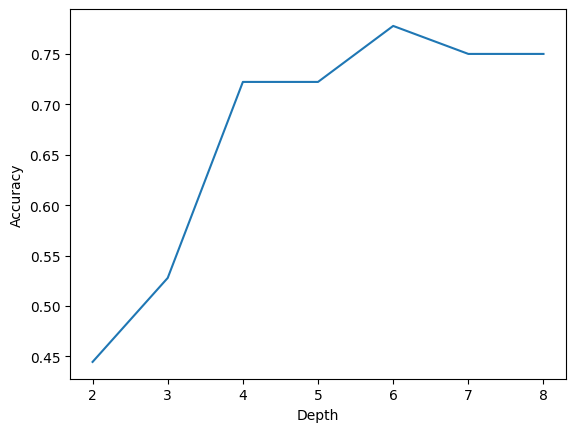

In [ ]:
#Question 4
#Decision tree with various depth
Depth=[2,3,4,5,6,7,8]
Accuracy_list=[]
for i in Depth:
  clf = DecisionTreeClassifier(max_depth=i, random_state=42)
  clf.fit(X_train_flat, y_train)
  y_pred = clf.predict(X_test_flat)
  accuracy1 = accuracy_score(y_test, y_pred)
  Accuracy_list.append(accuracy1)
  print(f"Accuracy: {accuracy1:.4f}")
  print("Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))

#plot accuracy vs depth
plt.plot(Depth,Accuracy_list)
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()

# Observation

We can observe from the above accuracy vs Depth curve that as we increase the depth of the tree the accuracy increases till an extent and then decreases till saturation. Such a behavior is observed because as we increase the depth, model slowly learns on the dataset with increasing accuracy until it starts overfitting. Because of overfitting, the model performs poorly on the test dataset as we increase the depth further and after a point it becomes constant because further increase in max depth does not change the tree developed.

# Question 5
Use PCA (Principal Component Analysis) on Total Acceleration
 to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities. Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities. Are you able to see any difference?

<ipython-input-112-51339f23e562>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('viridis', len(classes)),


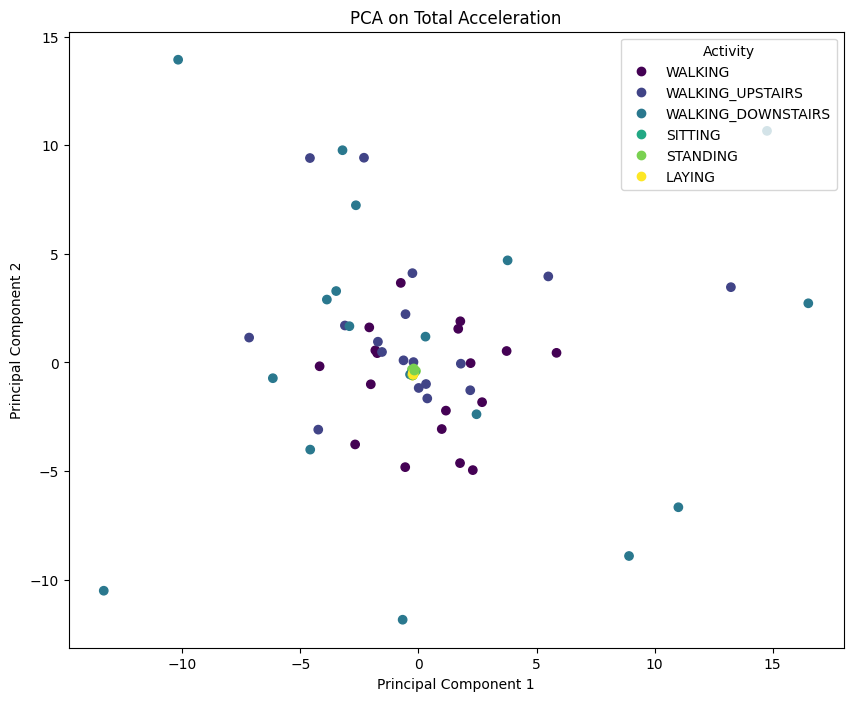

In [ ]:
#Q5 1
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Calculate total acceleration for each data point
total_acceleration = np.sum(X_train[:, :, :]**2, axis=2)


# Apply PCA to compress the total acceleration into two features
pca = PCA(n_components=2)
compressed_acceleration = pca.fit_transform(total_acceleration)

# Create a DataFrame for visualization
df_visualization = pd.DataFrame(data={"Principal Component 1": compressed_acceleration[:, 0],
                                      "Principal Component 2": compressed_acceleration[:, 1],
                                      "Activity": y_train})

# Plot the scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x=df_visualization["Principal Component 1"],
                      y=df_visualization["Principal Component 2"],
                      c=df_visualization["Activity"],
                      cmap=plt.cm.get_cmap('viridis', len(classes)),
                      alpha=1)    # Alpha is the transparency of the points in the plot
plt.title('PCA on Total Acceleration')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], title='Activity', labels=classes.keys())
plt.show()


In [ ]:
import tsfel
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold


# Feature extraction for training data
df_train = pd.DataFrame()
for i in range(X_train.shape[0]):  # Adjust the loop indices accordingly
    features_train = tsfel.time_series_features_extractor(tsfel.get_features_by_domain(), X_train[i, :, 0])
    df_train = pd.concat([df_train, pd.DataFrame(features_train)], axis=0)
print(df_train.shape)
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
# Feature extraction for testing data
df_test = pd.DataFrame()
for i in range(X_test.shape[0]):  # Adjust the loop indices accordingly
    features_test = tsfel.time_series_features_extractor(tsfel.get_features_by_domain(), X_test[i, :, 0])
    df_test = pd.concat([df_test, pd.DataFrame(features_test)], axis=0)






df_train=df_train[[ '0_Wavelet absolute mean_0',"0_Fundamental frequency",'0_MFCC_11',"0_Human range energy","0_ECDF_9","0_FFT mean coefficient_0",'0_MFCC_1','0_LPCC_0','0_Max power spectrum'
       ]]
df_train = df_train.dropna()



df_test=df_test[[ '0_Wavelet absolute mean_0',"0_Fundamental frequency",'0_MFCC_11',"0_Human range energy","0_ECDF_9","0_FFT mean coefficient_0",'0_MFCC_1','0_LPCC_0','0_Max power spectrum'
       ]]
df_test = df_test.dropna()
# Highly correlated features are removed
corr_features = tsfel.correlated_features(df_train)
df_train.drop(corr_features, axis=1, inplace=True)
df_test.drop(corr_features, axis=1, inplace=True)
# Remove low variance features
selector = VarianceThreshold()
df_train = selector.fit_transform(df_train)
df_test = selector.transform(df_test)

# Normalising Features
scaler = preprocessing.StandardScaler()
nX_train = scaler.fit_transform(df_train)
nX_test = scaler.transform(df_test)


Here we have extracted the features using the TSFEL library to obtain 8 features that provide good results. We use them for PCA and plot a scatter plot to visualize different class of activities.

(108, 2)


<ipython-input-114-162d66faede8>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('viridis', len(classes)),


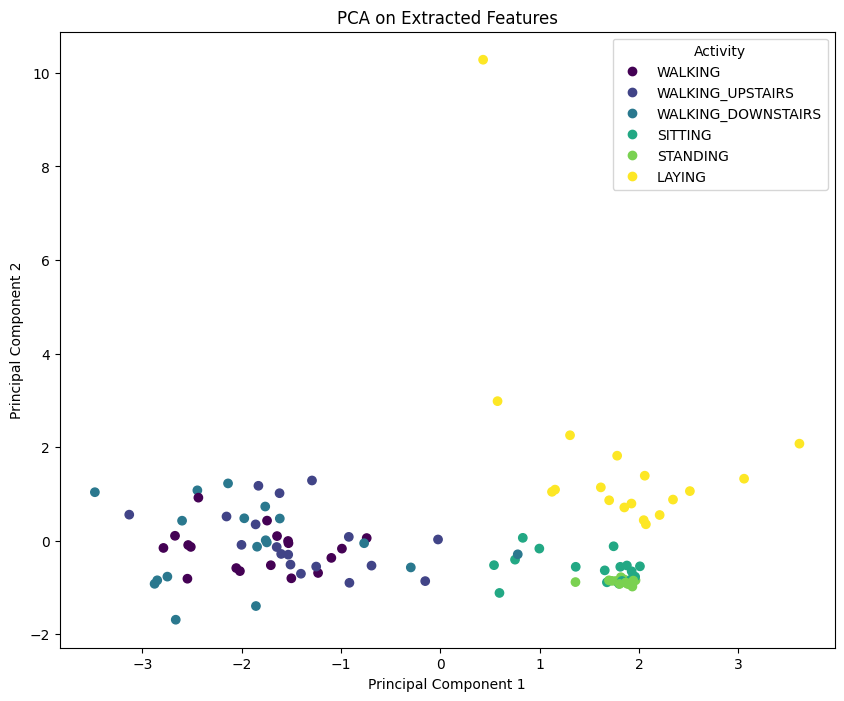

In [ ]:
#Q5 2
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Calculate total acceleration for each data point


# Apply PCA to compress the total acceleration into two features
pca = PCA(n_components=2)
compressed_acceleration = pca.fit_transform(nX_train)
print(compressed_acceleration.shape)
# Create a DataFrame for visualization
df_visualization = pd.DataFrame(data={"Principal Component 1": compressed_acceleration[:, 0],
                                      "Principal Component 2": compressed_acceleration[:, 1],
                                      "Activity": y_train})

# Plot the scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x=df_visualization["Principal Component 1"],
                      y=df_visualization["Principal Component 2"],
                      c=df_visualization["Activity"],
                      cmap=plt.cm.get_cmap('viridis', len(classes)),
                      alpha=1)    # Alpha is the transparency of the points in the plot
plt.title('PCA on Extracted Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=scatter.legend_elements()[0], title='Activity', labels=classes.keys())
plt.show()


## Observation
In previous scatter plot, the activities were not well separated. This was because acceleration alone was not enough to separate the activities. After extracting the features from the acceleration, we applied PCA to reduce the dimensionality of the data from 8 to 2.
The scatter plot clearly displays the different activities in the dataset. We can see that the activities are well separated in the reduced space. This difference has arisen due to our selection of better features to reduce the dimensionality of the data.

# Question 6
Use the features obtained from TSFEL and train a Decision Tree. Report the accuracy and confusion matrix using test set. Does featurizing works better than using the raw data? Train Decision Tree with varrying depths (2-8) and compare the accuracies obtained in Q4 with the accuracies obtained using featured trainset. Plot the accuracies obtained in Q4 against the accuracies obtained in this question


In [ ]:

# Assuming y_train and y_test are already defined
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(nX_train, y_train)

# Make predictions on the testing set
y_pred = dt_classifier.predict(nX_test)

# Evaluate accuracy on the testing set
accuracy = accuracy_score(y_test, y_pred[:df_test.shape[0]])  # Adjust the indexing accordingly
print("Decision Tree Classifier Accuracy on Testing Set: {:.2f}%".format(accuracy * 100))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred[:df_test.shape[0]])  # Adjust the indexing accordingly
print(cm)


Decision Tree Classifier Accuracy on Testing Set: 83.33%
[[6 0 0 0 0 0]
 [1 2 3 0 0 0]
 [0 0 6 0 0 0]
 [0 0 0 5 1 0]
 [0 0 0 1 5 0]
 [0 0 0 0 0 6]]


Accuracy: 0.5000
Confusion Matrix:
[[6 0 0 0 0 0]
 [6 0 0 0 0 0]
 [6 0 0 0 0 0]
 [0 0 0 6 0 0]
 [0 0 0 6 0 0]
 [0 0 0 0 0 6]]
Accuracy: 0.6389
Confusion Matrix:
[[5 1 0 0 0 0]
 [3 3 0 0 0 0]
 [1 5 0 0 0 0]
 [0 0 0 3 3 0]
 [0 0 0 0 6 0]
 [0 0 0 0 0 6]]
Accuracy: 0.7222
Confusion Matrix:
[[5 1 0 0 0 0]
 [1 2 3 0 0 0]
 [0 2 4 0 0 0]
 [0 0 0 4 2 0]
 [0 0 0 1 5 0]
 [0 0 0 0 0 6]]
Accuracy: 0.7778
Confusion Matrix:
[[5 1 0 0 0 0]
 [1 2 3 0 0 0]
 [0 0 6 0 0 0]
 [0 0 0 4 2 0]
 [0 0 0 1 5 0]
 [0 0 0 0 0 6]]
Accuracy: 0.7778
Confusion Matrix:
[[5 1 0 0 0 0]
 [1 2 3 0 0 0]
 [0 0 6 0 0 0]
 [0 0 0 4 2 0]
 [0 0 0 1 5 0]
 [0 0 0 0 0 6]]
Accuracy: 0.7500
Confusion Matrix:
[[6 0 0 0 0 0]
 [1 2 3 0 0 0]
 [0 0 6 0 0 0]
 [0 0 0 4 2 0]
 [0 0 0 3 3 0]
 [0 0 0 0 0 6]]
Accuracy: 0.8333
Confusion Matrix:
[[6 0 0 0 0 0]
 [1 2 3 0 0 0]
 [0 0 6 0 0 0]
 [0 0 0 5 1 0]
 [0 0 0 1 5 0]
 [0 0 0 0 0 6]]


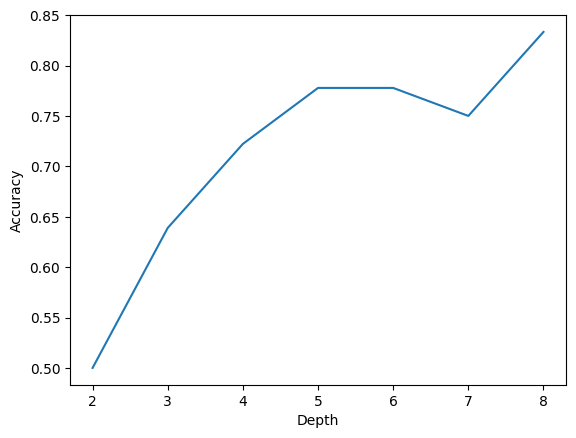

In [ ]:

#Decision tree with various depth
Depth=[2,3,4,5,6,7,8]
Accuracy_list2=[]
for i in Depth:
  clf = DecisionTreeClassifier(max_depth=i, random_state=42)
  clf.fit(nX_train, y_train)
  y_pred = clf.predict(nX_test)
  accuracy1 = accuracy_score(y_test, y_pred)
  Accuracy_list2.append(accuracy1)
  print(f"Accuracy: {accuracy1:.4f}")
  print("Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))

#plot accuracy vs depth
plt.plot(Depth,Accuracy_list2)
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()

We can clearly observe that the accuracy increases as we increase the depth of the tree. The graph looks similar to the previous one with raw data.

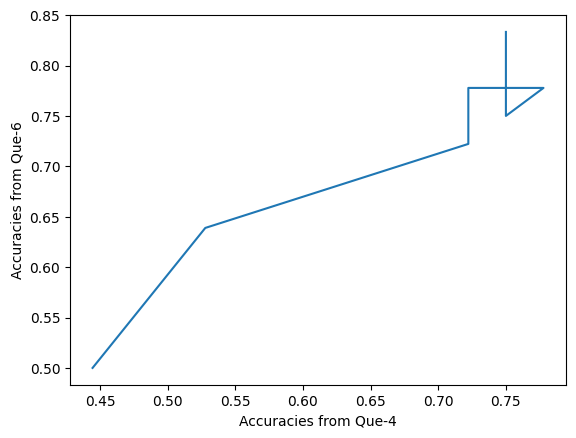

In [ ]:
# Plot accuracies from Que-4 and Que-6
plt.plot(Accuracy_list,Accuracy_list2)
plt.xlabel("Accuracies from Que-4")
plt.ylabel("Accuracies from Que-6")
plt.show()


# Observation
As we can see clearly from the graphs, the accuracy obtained in question 6 is higher than that obtained in question 4. The slope overall remains almost constant which indicates that the rate of increase in accuracy with depth is same in both cases. There is clear difference in accuracy obtained in both cases. Thus featurizing works better than the raw data.

# Question 7
Are there any participants/ activitivies where the Model performace is bad? If Yes, Why?

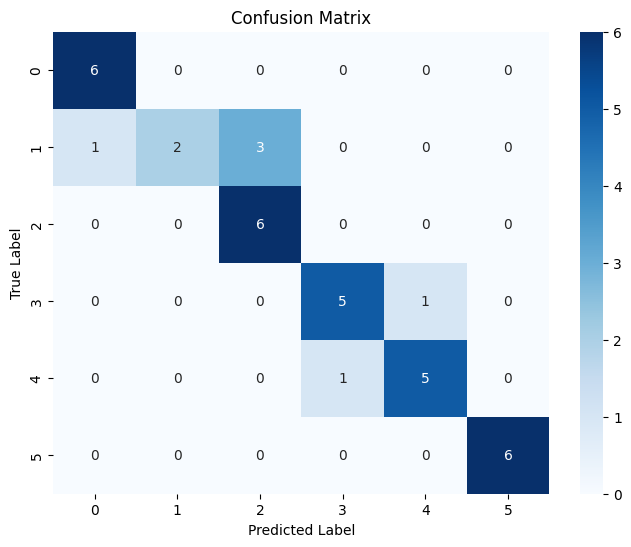

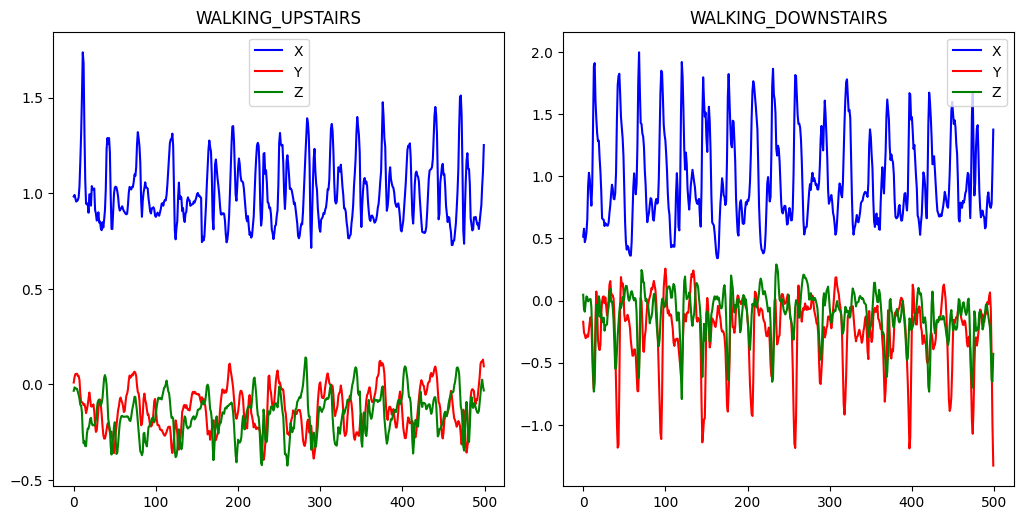

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix =  [[6, 0, 0, 0, 0, 0],
               [1, 2, 3, 0, 0, 0],
               [0, 0, 6, 0, 0, 0],
               [0, 0, 0, 5, 1, 0],
               [0, 0, 0, 1, 5, 0],
               [0, 0, 0, 0, 0, 6]]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
# Plotting waveforms for each activity class
activities = list(classes.keys())

plt.figure(figsize=(15, 10))

for i, activity in enumerate(activities, 1):
    if i==2 or i==3:

      plt.subplot(2, 3, i)
      activity_indices = np.where(y_train == classes[activity])[0]
      sample_data = X_train[activity_indices][0,:,0]  # Taking the first sample for illustration ; X axis
      #color

      plt.plot(sample_data.flatten(), color='blue',label="X")

      plt.title(activity)
      sample_data = X_train[activity_indices][0,:,1]  # Taking the first sample for illustration ; Y axis
      plt.plot(sample_data.flatten(), color='red',label="Y")

      plt.title(activity)
      sample_data = X_train[activity_indices][0,:,2]  # Taking the first sample for illustration ; Z axis
      plt.plot(sample_data.flatten(), color='green',label="Z")

      plt.title(activity)
      plt.legend()


plt.tight_layout()
plt.show()

# Observation
From the Heat map, we can see that our model failed most between the activities 2 and 3 which represent walking upstairs and walking downstairs. On plotting the data for these activities, we can see that the two activities have fairly similar data. Though the acceleration in downstairs is more negative than in upstairs, the model is not able to distinguish between the two activities.

 This could be due to the selection of features which do not contain enough information on these aspects of the data thereby leading to poor results. The model confused these activities 3 times. The model also confused once between standing and sitting data. This is due to the activities being very similar to each other in terms of acceleration which makes them difficult to distinguish.  

 In order to overcome these issues, we can add more features by using more features which contain more information on these aspects of the data. One other option would be to add more weights to the features with these aspects of the data.

# Deployment


We have prepared a dataset for the testing of the model. The data from the mobile application has been converted to a csv file which contains 24 samples with 1500 features, 500 each from the accelerations in each axis.

In [ ]:
test_path="Collected_Dataset"
X_test=pd.read_csv(os.path.join(test_path,"Updated_xyz_24X1500.csv"))
print(X_test)
# Flatten the input data for Decision Tree classifier
X_test = X_test.values.reshape(X_test.shape[0], -1)

X_train_flat = X_train.reshape(X_train.shape[0], -1)


labels = [5, 5, 5, 5, 4, 4, 4, 4, 6, 6, 6, 6, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]
y_test=pd.Series(labels)
print(X_test.shape)

         0       1       2       3       4       5       6       7       8  \
0   0.9979  0.9979  0.9949  0.9935  0.9969  0.9974  0.9964  0.9988  0.9998   
1   0.9964  0.9969  0.9998  1.0008  1.0003  0.9930  0.9920  0.9949  0.9984   
2   0.9901  0.9920  0.9920  0.9959  0.9925  0.9949  0.9964  0.9959  0.9959   
3   0.9783  0.9817  0.9832  0.9847  0.9803  0.9822  0.9847  0.9822  0.9817   
4   0.9964  0.9964  0.9964  0.9964  0.9925  0.9969  1.0003  0.9979  0.9920   
5   0.9920  0.9915  0.9964  1.0037  1.0023  0.9993  0.9959  0.9915  0.9896   
6   0.9988  0.9969  1.0008  1.0003  0.9974  0.9954  0.9988  1.0028  1.0008   
7   0.9915  0.9920  0.9935  0.9944  0.9944  0.9920  0.9910  0.9871  0.9901   
8   0.0754  0.0759  0.0788  0.0724  0.0744  0.0768  0.0783  0.0812  0.0798   
9   0.1433  0.1448  0.1438  0.1472  0.1555  0.1521  0.1462  0.1389  0.1355   
10  0.1467  0.1408  0.1316  0.1233  0.1174  0.1223  0.1296  0.1374  0.1364   
11  0.1482  0.1462  0.1457  0.1428  0.1433  0.1467  0.1467  0.14

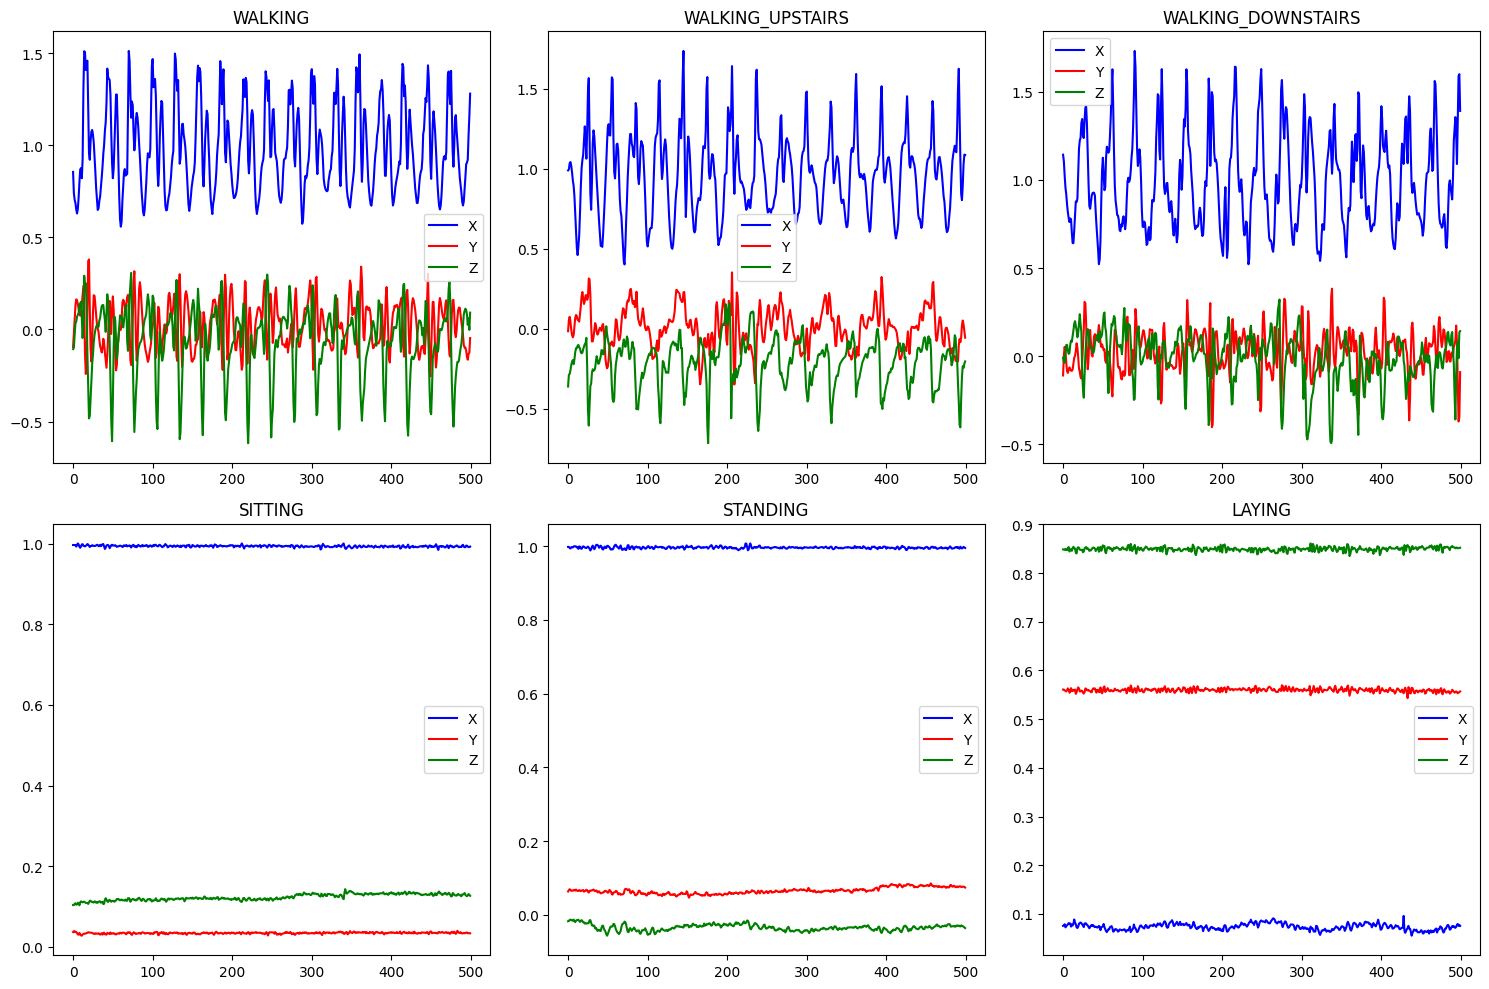

In [ ]:
import matplotlib.pyplot as plt

# Plotting waveforms for each activity class
activities = list(classes.keys())

plt.figure(figsize=(15, 10))

for i, activity in enumerate(activities, 1):
    plt.subplot(2, 3, i)
    activity_indices = np.where(y_test == classes[activity])[0]
    sample_data = X_test[activity_indices][0,:500]  # Taking the first sample for illustration ; X axis
    #color

    plt.plot(sample_data.flatten(), color='blue',label="X")

    plt.title(activity)
    sample_data = X_test[activity_indices][0,500:1000]  # Taking the first sample for illustration ; Y axis
    plt.plot(sample_data.flatten(), color='red',label="Y")

    plt.title(activity)
    sample_data = X_test[activity_indices][0,1000:1500]  # Taking the first sample for illustration ; Z axis
    plt.plot(sample_data.flatten(), color='green',label="Z")

    plt.title(activity)
    plt.legend()
plt.tight_layout()
plt.show()

Plotted data looks similar to the training data from UCI dataset but it is very different. The distinction between the dynamic and static activities is fairly clear but the division between individual activities is not clear. As observable from the plot, the values for sitting and standing are very similar. This will pose a challenge for the model.

In [ ]:
import numpy as np
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,mean_squared_error
import matplotlib.pyplot as plt


print(X_train.shape)
print(X_test.shape)
labels = [5, 5, 5, 5, 4, 4, 4, 4, 6, 6, 6, 6, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]
y_test=pd.Series(labels)
# Flatten the input data for Decision Tree classifier
X_train_flat = X_train.reshape(X_train.shape[0], -1)
print(X_train_flat.shape)
#X_test_flat = X_test.reshape(X_test.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train_flat, y_train)

# Make predictions on the testing set
y_pred = dt_classifier.predict(X_test)

# Evaluate accuracy on the testing set
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Classifier Accuracy on Testing Set: {:.2f}%".format(accuracy * 100))

#Confusion Martix
cm = confusion_matrix(y_test, y_pred)
print(cm)


(108, 500, 3)
(24, 1500)
(108, 1500)
Decision Tree Classifier Accuracy on Testing Set: 0.00%
[[0 0 0 0 0 4]
 [0 0 0 0 0 4]
 [0 0 0 0 0 4]
 [0 0 0 0 0 4]
 [0 0 0 0 0 4]
 [0 0 0 4 0 0]]


The accuracy of the model obtained using raw data is 0.000, which is very poor. We have tried to normalize the data to improve the accuracy, but it did not work. On observing the predictions and the confusion matrix, we get some insights to what the issues could be.

In [ ]:
y_pred


array([6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 3, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6])

We observe that our model is mostly predicting the activity to be laying, except when it is actually laying, thereby giving us the worst accuracy. We checked if the model is underfitting or not. On testing for the Training data, the model gave 100% accuracy. Therfore one conclusion we drew was that the model is overfitting.
This overfitting may have been a result of the large number of features in the dataset. The more the number of features, the more complex the model will be. This complexity leads to a higher variance in the model.

## Testing by Extracting Features

In [ ]:
import numpy as np
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,mean_squared_error
import matplotlib.pyplot as plt

test_path="Collected_Dataset"
X_test=pd.read_csv(os.path.join(test_path,"Final_24X500.csv"))
print(X_test)
# Flatten the input data for Decision Tree classifier
X_test = X_test.values.reshape(X_test.shape[0], -1)



labels = [5, 5, 5, 5, 4, 4, 4, 4, 6, 6, 6, 6, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]
y_test=pd.Series(labels)
print(X_train.shape)
print(X_test.shape)




import tsfel
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming you have already installed TSFEL
# You can install it using: pip install tsfel

# Assuming X_train, X_test, y_train, y_test are defined

# Feature extraction for training data
df_train = pd.DataFrame()
for i in range(X_train.shape[0]):  # Adjust the loop indices accordingly
    features_train = tsfel.time_series_features_extractor(tsfel.get_features_by_domain(), X_train[i, :, 0])
    df_train = pd.concat([df_train, pd.DataFrame(features_train)], axis=0)
print(df_train.shape)
# Feature extraction for testing data
df_test = pd.DataFrame()
for i in range(X_test.shape[0]):  # Adjust the loop indices accordingly
    flattened_signal = X_test[i, :]
    features_test = tsfel.time_series_features_extractor(tsfel.get_features_by_domain(), flattened_signal)
    df_test = pd.concat([df_test, pd.DataFrame(features_test)], axis=0)


df_train=df_train[[ '0_Wavelet absolute mean_0',"0_Fundamental frequency",'0_MFCC_11',"0_Human range energy","0_ECDF_9","0_FFT mean coefficient_0",'0_MFCC_1','0_LPCC_0','0_Max power spectrum'
       ]]
df_train = df_train.dropna()




df_test=df_test[[ '0_Wavelet absolute mean_0',"0_Fundamental frequency",'0_MFCC_11',"0_Human range energy","0_ECDF_9","0_FFT mean coefficient_0",'0_MFCC_1','0_LPCC_0','0_Max power spectrum'
       ]]
df_test = df_test.dropna()

# Highly correlated features are removed
corr_features = tsfel.correlated_features(df_train)
df_train.drop(corr_features, axis=1, inplace=True)
df_test.drop(corr_features, axis=1, inplace=True)
# Remove low variance features
selector = VarianceThreshold()
df_train = selector.fit_transform(df_train)
df_test = selector.transform(df_test)

# Normalising Features
scaler = preprocessing.StandardScaler()
nX_train = scaler.fit_transform(df_train)
nX_test = scaler.transform(df_test)

# Assuming y_train and y_test are already defined
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(nX_train, y_train)

# Make predictions on the testing set
y_pred = dt_classifier.predict(nX_test)

# Evaluate accuracy on the testing set
accuracy = accuracy_score(y_test, y_pred[:df_test.shape[0]])  # Adjust the indexing accordingly
print("Decision Tree Classifier Accuracy on Testing Set: {:.2f}%".format(accuracy * 100))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred[:df_test.shape[0]])  # Adjust the indexing accordingly
print(cm)



We can observe, that on using extracted features, the accuracy of the model has increased to 33.33%. This indicates that using lesser and more accurate features has improved the accuracy of the model. This is because using lesser features has reduced the complexity of the model therby eliminating the high variance in the model.

Even after using extracted features, the accuracy of the model has increased to 33.33%. This accuracy is far worse than the accuracy achieved using the test dataset of UCI dataset. This can also indicate the issues due to different kind of datasets. The model we are using was trained on UCI dataset. As seen in the video demonstrating data acquisition of UCI, the orientation of the device used is not specified. We have tried to take the data in the same orientation but may have missed some specifics. The difference in data acquisition methods may have caused the huge difference in the accuracy of the model.

The model can be further improved by training it with a mixture of the UCI dataset and data we obtained from different sources. This will help the model to overcome the high variance and improve the accuracy.